In [21]:
#Librerias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

In [22]:
#Carga de datos

datos = pd.read_csv('C:\\Users\\USUARIO\\Desktop\\Titanic-Dataset.csv')

In [23]:
# Análisis exploratorio de datos (EDA)
print(datos.head())  # Ver las primeras filas del DataFrame

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [24]:
print(datos.info())  # Información general sobre el DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
print(datos.describe())  # Estadísticas descriptivas

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [25]:
# Verificación de valores nulos
print(datos.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


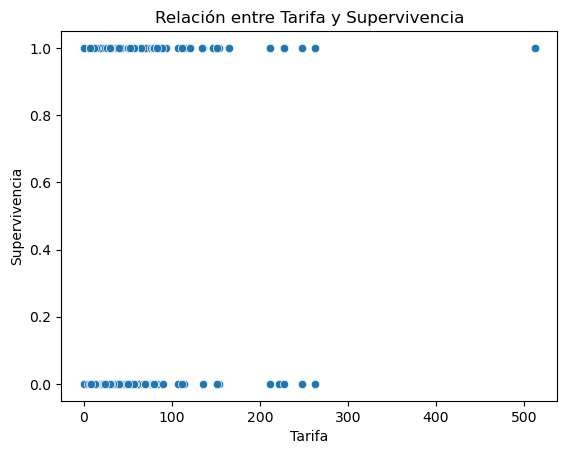

In [26]:
# Análisis de la relación entre tarifa y supervivencia
sns.scatterplot(x='Fare', y='Survived', data=datos)
plt.title('Relación entre Tarifa y Supervivencia')
plt.xlabel('Tarifa')
plt.ylabel('Supervivencia')
plt.show()

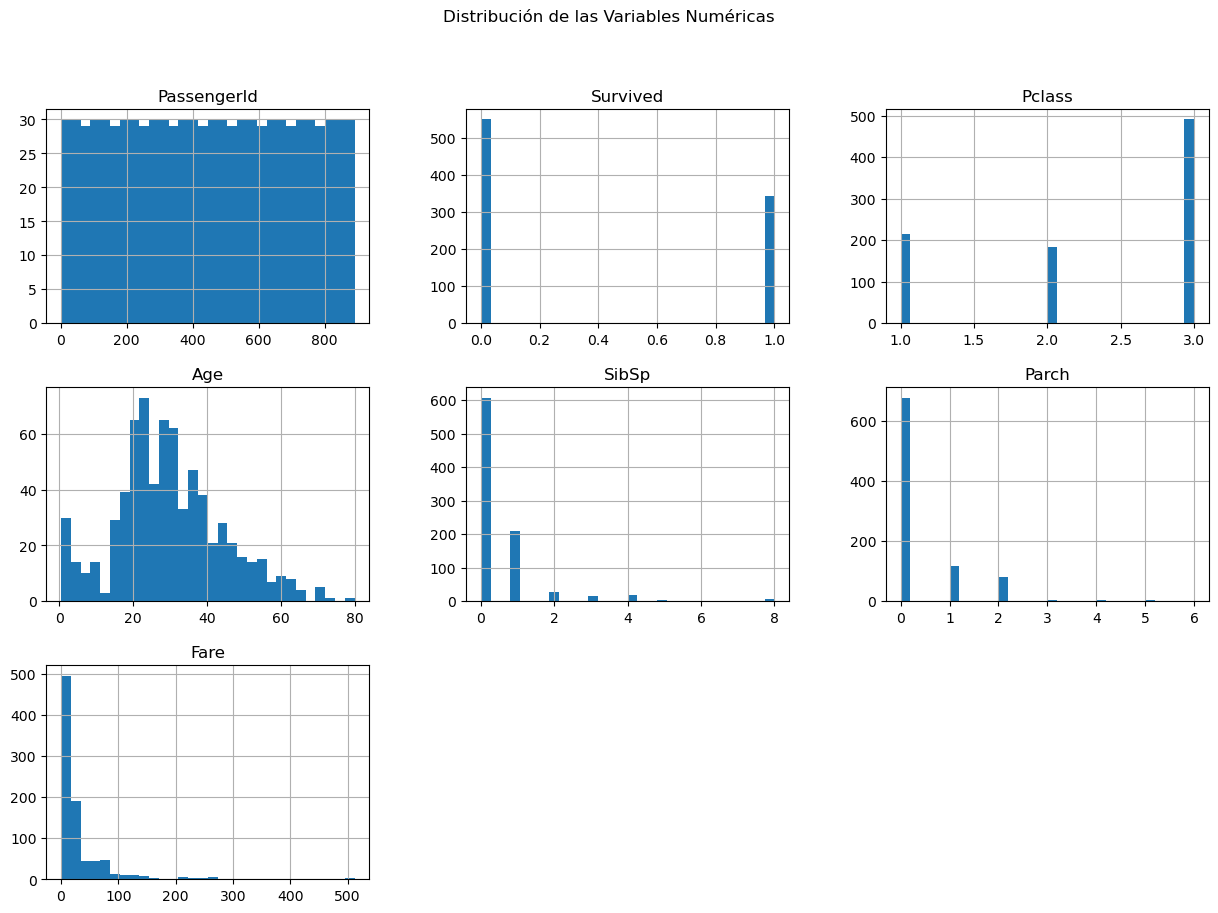

In [27]:
# Distribución de las variables numéricas

datos.select_dtypes(include=['float64', 'int64']).hist(figsize=(15, 10), bins=30)
plt.suptitle('Distribución de las Variables Numéricas')
plt.show()

In [28]:
# Tratamiento de valores faltantes
datos = datos[['Fare', 'Survived']].dropna()

In [30]:
# Verificación de valores faltantes
datos.isnull().sum()

Fare        0
Survived    0
dtype: int64

In [31]:
# Selección de características
# División del dataset
X = datos[['Fare']]
y = datos['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Entrenamiento del modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [35]:
# Predicciones con el conjunto de prueba
y_pred = modelo.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Coeficiente de Determinación (R²): {r2}')

Error Cuadrático Medio (MSE): 0.22338067837667974
Coeficiente de Determinación (R²): 0.07884938019727206


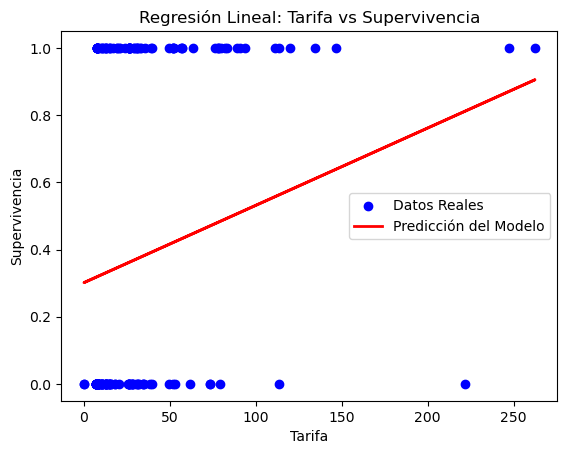

In [36]:
# Gráfica de los resultados
plt.scatter(X_test, y_test, color='blue', label='Datos Reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicción del Modelo')
plt.title('Regresión Lineal: Tarifa vs Supervivencia')
plt.xlabel('Tarifa')
plt.ylabel('Supervivencia')
plt.legend()
plt.show()

In [41]:
# Interpretación de Resultados del Modelo de Regresión Lineal

## Desempeño del Modelo

##  Error Cuadrático Medio (MSE): 0.22
## Indica que, en promedio, la predicción de la supervivencia difiere de la realidad en 0.22 unidades.
## Coeficiente de Determinación (R^2): 0.07
## Indica que el 7% de la variabilidad en la supervivencia se puede explicar por la tarifa del boleto.

## Análisis de la Relación Tarifa-Supervivencia

## La tarifa del boleto tiene una relación positiva con la supervivencia.
## Los pasajeros que pagaron tarifas más altas tienen una mayor probabilidad de supervivencia.
## La dispersión de los datos sugiere que otros factores también influyen en la supervivencia.

## Conclusión

## El modelo de regresión lineal indica que la tarifa del boleto es un factor significativo en la predicción de la supervivencia, aunque explica solo una parte de la variabilidad